In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.shape

(144, 2)

In [7]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [8]:
df.count()

Month          144
#Passengers    144
dtype: int64

In [9]:
df['#Passengers'].value_counts()

229    3
306    2
405    2
242    2
196    2
      ..
191    1
209    1
230    1
218    1
432    1
Name: #Passengers, Length: 118, dtype: int64

In [10]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [11]:
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [12]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [13]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col=['Month'])

In [15]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
df['1951-04-01':'1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [17]:
df.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

In [18]:
df.iloc[135]

#Passengers    461
Name: 1960-04-01 00:00:00, dtype: int64

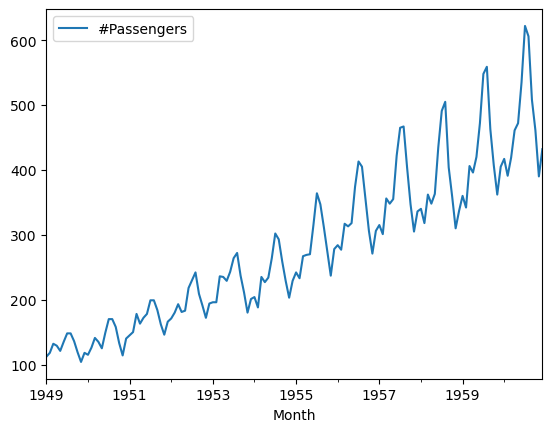

In [19]:
df.plot()
plt.show()

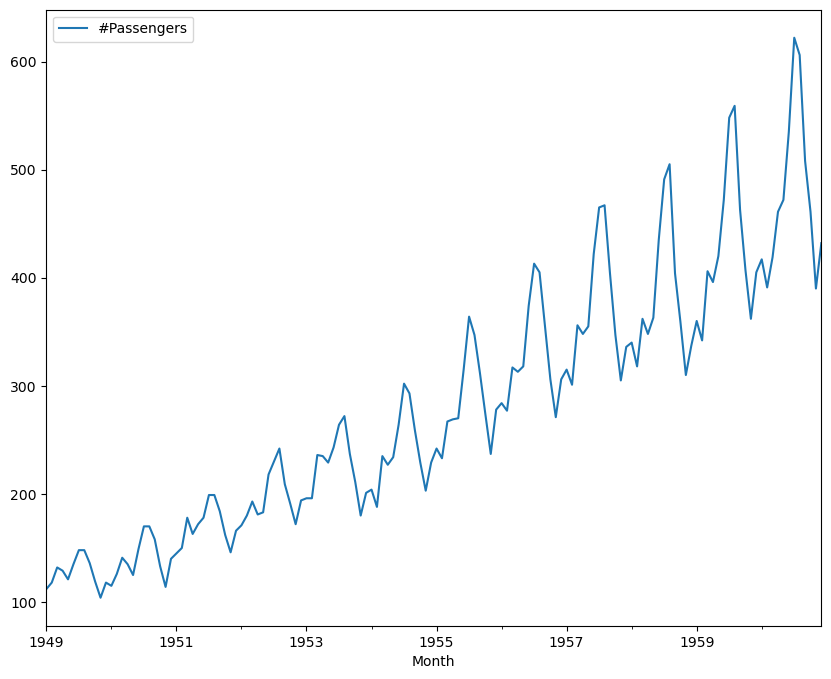

In [20]:
# increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
df.plot()
plt.show()

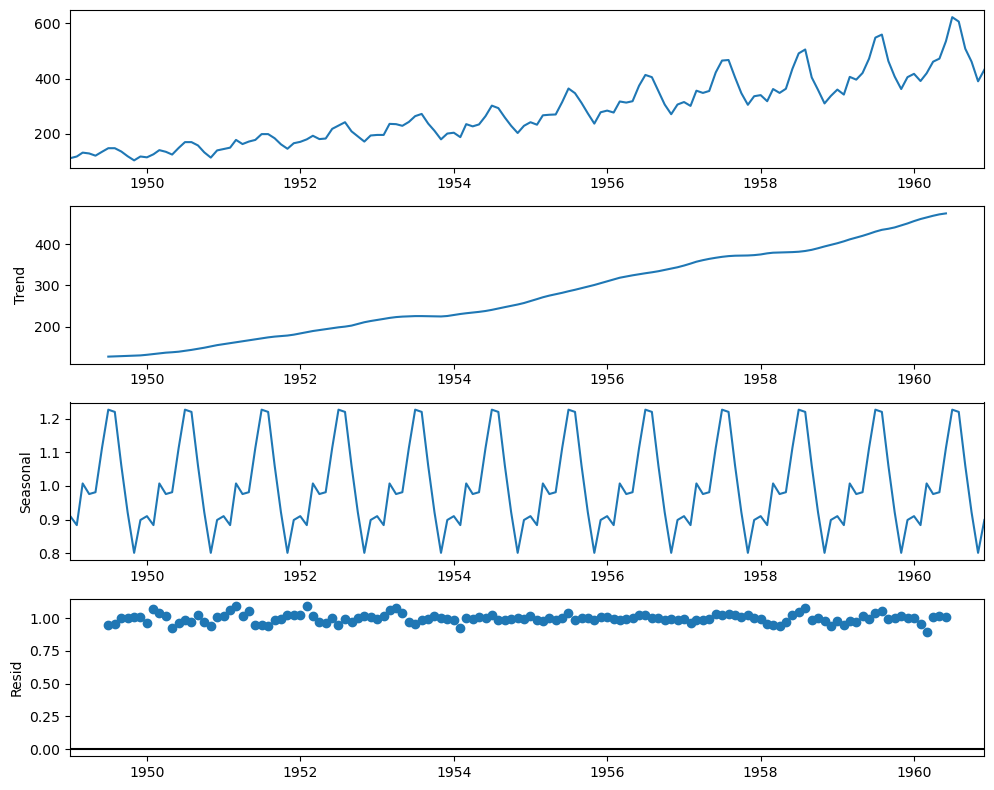

In [21]:
# decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df,model='multiplicative')
df_mul_decompose.plot()
plt.show()

In [22]:
# lets try to do log transformation
df_log = df.copy()

In [23]:
df_log.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
df_log['#Passengers'] = np.log(df)

In [25]:
df_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


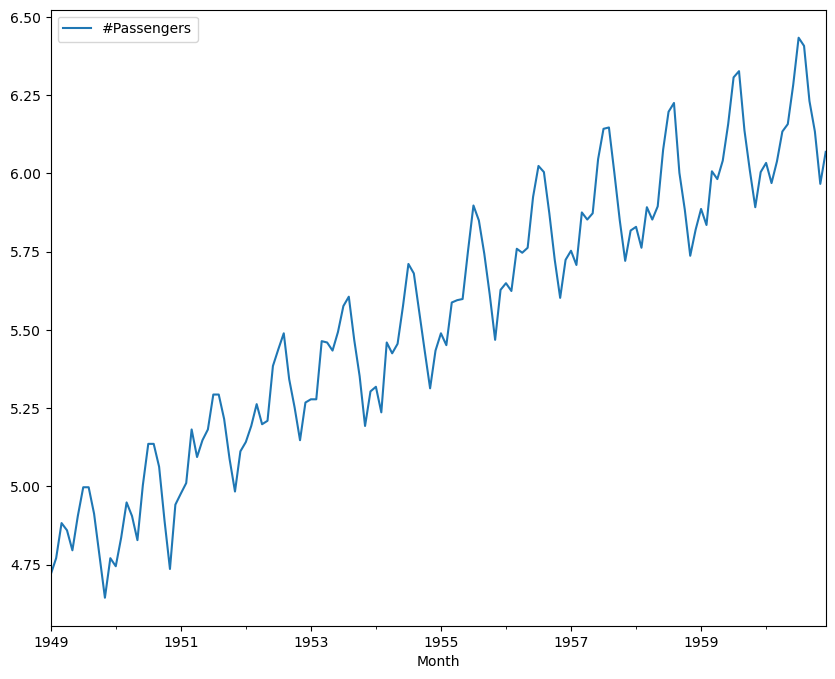

In [26]:
df_log.plot()
plt.show()

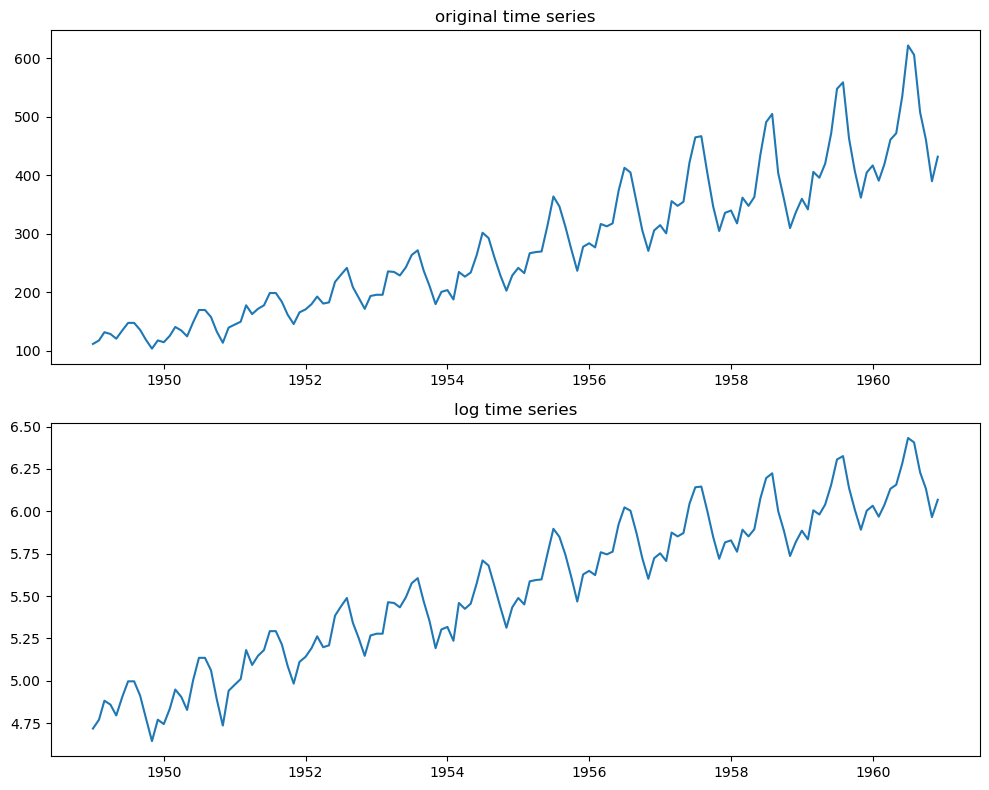

In [27]:
# compare with the original series

plt.subplot(2,1,1)
plt.title('original time series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('log time series')
plt.plot(df_log)
plt.tight_layout()

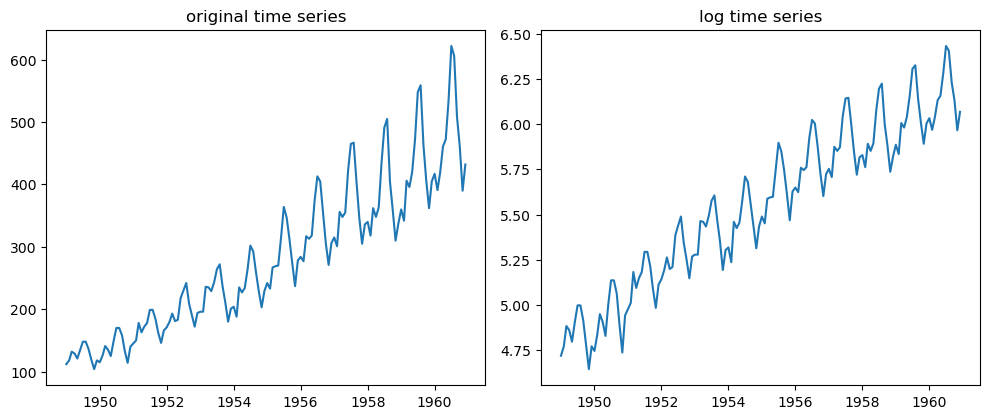

In [28]:
plt.subplot(2,2,1)
plt.title('original time series')
plt.plot(df)

plt.subplot(2,2,2)
plt.title('log time series')
plt.plot(df_log)
plt.tight_layout()